<a href="https://colab.research.google.com/github/Trieu1020/CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from PIL import Image

# Các nhãn
name_classes = ['Trieu', 'Quan', 'Nhan', 'Tuan', 'LamAnh']
mssv_classes = ['31241020662', '31241020766', '31241023425', '31241024129', '31241028367']
emotion_classes = ['binhthuong', 'vui', 'batngo']

# Load dữ liệu
X = []
y_name = []
y_mssv = []
y_emotion = []

data_dir = '/content/drive/MyDrive/data'

for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        parts = folder.split('_')
        if len(parts) == 3:
            mssv = parts[1]
            name = parts[2]
        else:
            continue

        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            if not img_name.lower().endswith(('.jpg', '.png', '.jpeg')):
              continue

            img = load_img(img_path, target_size=(32, 32), color_mode='rgb')
            img_array = img_to_array(img) / 255.0
            X.append(img_array)

            y_name.append(name_classes.index(name))
            y_mssv.append(mssv_classes.index(mssv))

            for emo in emotion_classes:
                if emo in img_name.lower():
                    y_emotion.append(emotion_classes.index(emo))
                    break

X = np.array(X)
y_name = to_categorical(y_name, num_classes=5)
y_mssv = to_categorical(y_mssv, num_classes=5)
y_emotion = to_categorical(y_emotion, num_classes=3)

X_train, X_test, y_name_train, y_name_test, y_mssv_train, y_mssv_test, y_emo_train, y_emo_test = train_test_split(
    X, y_name, y_mssv, y_emotion, test_size=0.2, random_state=42)

input_layer = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(256, activation='relu')(x)

out_name = Dense(5, activation='softmax', name='name')(x)
out_mssv = Dense(5, activation='softmax', name='mssv')(x)
out_emo = Dense(3, activation='softmax', name='emotion')(x)

model = Model(inputs=input_layer, outputs=[out_name, out_mssv, out_emo])

model.compile(optimizer='adam',
              loss={
                  'name': 'categorical_crossentropy',
                  'mssv': 'categorical_crossentropy',
                  'emotion': 'categorical_crossentropy'
              },
              metrics={
                  'name': 'accuracy',
                  'mssv': 'accuracy',
                  'emotion': 'accuracy'
              })

model.summary()

model.fit(X_train,
          {'name': y_name_train, 'mssv': y_mssv_train, 'emotion': y_emo_train},
          epochs=100,
          validation_data=(X_test, {'name': y_name_test, 'mssv': y_mssv_test, 'emotion': y_emo_test}))

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 32, 32,    │      9,248 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 16, 16,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 16, 16,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 16, 16,    │     36,928 │ conv2d_2[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 8, 8, 64)  │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 8, 8, 128) │     73,856 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 8, 8, 128) │    147,584 │ conv2d_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 4, 4, 128) │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 2048)      │          0 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │    262,272 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │     33,024 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ name (Dense)        │ (None, 5)         │      1,285 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mssv (Dense)        │ (None, 5)         │      1,285 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ emotion (Dense)     │ (None, 3)         │        771 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 585,645 (2.23 MB)

 Trainable params: 585,645 (2.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - emotion_accuracy: 0.3241 - emotion_loss: 1.1092 - loss: 4.3239 - mssv_accuracy: 0.2357 - mssv_loss: 1.6238 - name_accuracy: 0.2357 - name_loss: 1.6284 - val_emotion_accuracy: 0.2222 - val_emotion_loss: 1.1023 - val_loss: 4.3289 - val_mssv_accuracy: 0.2222 - val_mssv_loss: 1.6124 - val_name_accuracy: 0.1111 - val_name_loss: 1.6142
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - emotion_accuracy: 0.3830 - emotion_loss: 1.1023 - loss: 4.3077 - mssv_accuracy: 0.2062 - mssv_loss: 1.6066 - name_accuracy: 0.1958 - name_loss: 1.6056 - val_emotion_accuracy: 0.2222 - val_emotion_loss: 1.1006 - val_loss: 4.3333 - val_mssv_accuracy: 0.2222 - val_mssv_loss: 1.6139 - val_name_accuracy: 0.1111 - val_name_loss: 1.6188
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - emotion_accuracy: 0.3726 - emotion_loss: 1.0969 - loss: 4.3084 - mssv_accuracy: 0.1958 - mssv_loss: 1.5959 - name_accuracy: 0.1958 - name_loss: 1.5990 - val_emotion_accuracy: 0.4444

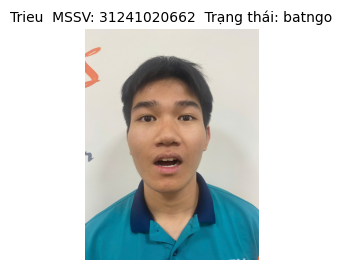

In [6]:
def predict_img(img_path):
    img = Image.open(img_path).convert('RGB')
    img_input = img.resize((32, 32))
    img_array = img_to_array(img_input) / 255.0
    img_input = img_array.reshape(1, 32, 32, 3)

    pred_name, pred_mssv, pred_emo = model.predict(img_input, verbose=0)

    predicted_name = name_classes[np.argmax(pred_name)]
    predicted_mssv = mssv_classes[np.argmax(pred_mssv)]
    predicted_emotion = emotion_classes[np.argmax(pred_emo)]

    plt.figure(figsize=(3, 3))
    plt.imshow(np.array(img))
    plt.axis('off')
    plt.title(f"{predicted_name}  MSSV: {predicted_mssv}  Trạng thái: {predicted_emotion}", fontsize=10)
    plt.show()

predict_img('/content/z6524874678642_a3f660f1dd69a158e89450f408796b3c.jpg')

